# Part 1: Low Level Vision (image > image)
> ## Week 1 ( Basic Image Processing Techniques)¶
>> **03- Non Linear Filtering (Median, Bilateral Filter, morphology )**

This is the curriculum for "Learn Computer Vision" by Siraj Raval on Youtube
https://github.com/llSourcell/Learn_Computer_Vision

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# helper function for plotting
def plot_me(i1,t1, i2,t2, i3,t3, i4,t4):
    f, ((ax1, ax2),(ax3, ax4)) = plt.subplots(2,2, figsize=(10,10))
    ax1.imshow(i1)
    ax1.title.set_text(t1)
    ax2.imshow(i2)
    ax2.title.set_text(t2)
    ax3.imshow(i3)
    ax3.title.set_text(t3)
    ax4.imshow(i4)
    ax4.title.set_text(t4)

**`few methods have already been covered in 01-Luminance (Brightness, contrast, gamma, histogram equalization).ipynb`**

**`still reposting them just for the sake of contuity of the course`**

## 1. Non Linear Filter- Median Filtering

In [3]:
def median_blurring(img):
    """reads input image and applies median blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # cv2.GaussianBlur(image, kernel_size, sigmaX, sigmaY
    img_3 = cv2.medianBlur(img, 3)
    img_7 = cv2.medianBlur(img, 7)
    img_11 = cv2.medianBlur(img, 11)
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 198 ms


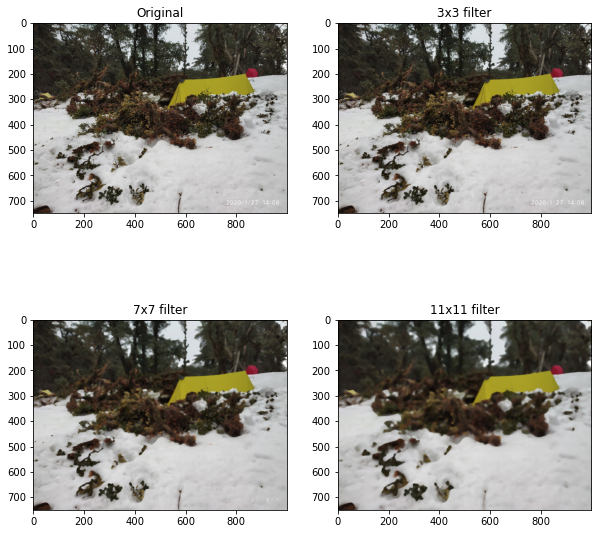

In [4]:
%%time
median_blurring("img2.jpg")

## 2. Non Linear Filter - Bilateral Filtering

In [5]:
def bilateral_blurring(img):
    """reads input image and applies bilateral blurring using given kernel size"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # cv2.bilateralFilter(image, d, sigmaColor, sigmaSpace
    # d is diameter of each pixel neighborhood considered for filtering
    # sigmaColor- Filter sigma in the color space. A larger value of the parameter means that
    # farther colors within the pixel neighborhood (see sigmaSpace) will be mixed together, 
    # resulting in larger areas of semi-equal color.
    # sigmaSpace- Filter sigma in the coordinate space. A larger value of the parameter means 
    # thatfarther pixels will influence each other as long as their colors are close enough . 
    # When d\>0, it specifies the neighborhood size regardless of sigmaSpace. Otherwise, d is
    # proportional to sigmaSpace.

    img_3 = cv2.bilateralFilter(img, 9, 75, 75)
    img_7 = cv2.bilateralFilter(img, 49, 75, 100)
    img_11 = cv2.bilateralFilter(img, 121, 75, 150)
    
    plot_me(img,"Original", img_3,"3x3 filter", img_7, "7x7 filter",img_11, "11x11 filter")

Wall time: 1.97 s


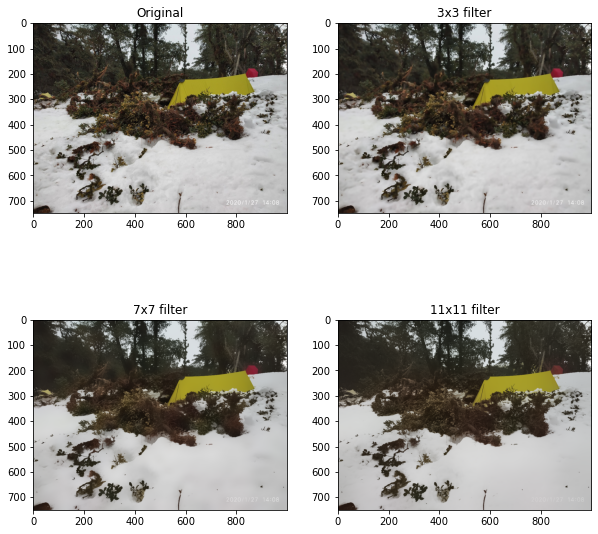

In [6]:
%%time
bilateral_blurring("img2.jpg")

## 3. Morphological Transformation

### 3.1 Erosion

In [7]:
def erosion(img):
    """reads an image and performs erosion op given a kernel"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    kernel_3 = np.ones((3,3), np.uint8)
    eroded_3 = cv2.erode(img, kernel_3, iterations=1)
    
    kernel_7 = np.ones((7,7), np.uint8)
    eroded_7 = cv2.erode(img, kernel_7, iterations=1)

    kernel_11 = np.ones((11,11), np.uint8)
    eroded_11 = cv2.erode(img, kernel_11, iterations=1)
    
    plot_me(img,"Original", eroded_3,"3x3 filter", eroded_7, "7x7 filter",eroded_11, "11x11 filter")
    plt.imsave("img_eroded.jpeg", eroded_11)

Wall time: 101 ms


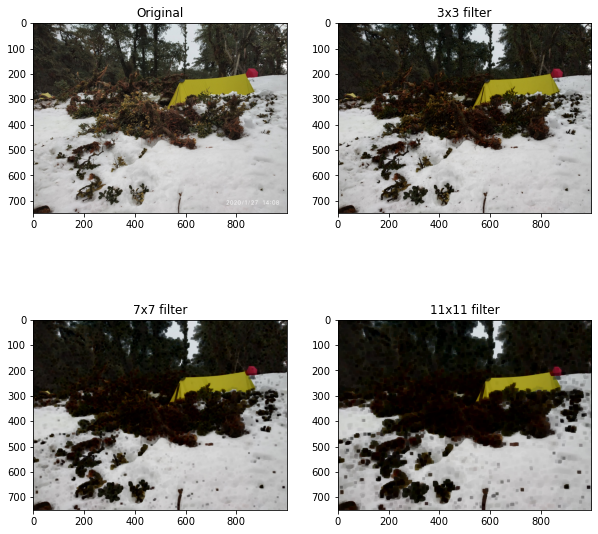

In [8]:
%%time
erosion("img2.jpg")

### 3.2 Dilation

In [9]:
def dilation(img):
    """reads an image and performs dilation op given a kernel"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    kernel_3 = np.ones((3,3), np.uint8)
    dilated_3 = cv2.dilate(img, kernel_3, iterations=1)
    
   
    kernel_7 = np.ones((7,7), np.uint8)
    dilated_7 = cv2.dilate(img, kernel_7, iterations=1)

    kernel_11 = np.ones((11,11), np.uint8)
    dilated_11 = cv2.dilate(img, kernel_11, iterations=1)
    
    plot_me(img,"Original", dilated_3,"3x3 filter", dilated_7, "7x7 filter", dilated_11, "11x11 filter")

Wall time: 72.1 ms


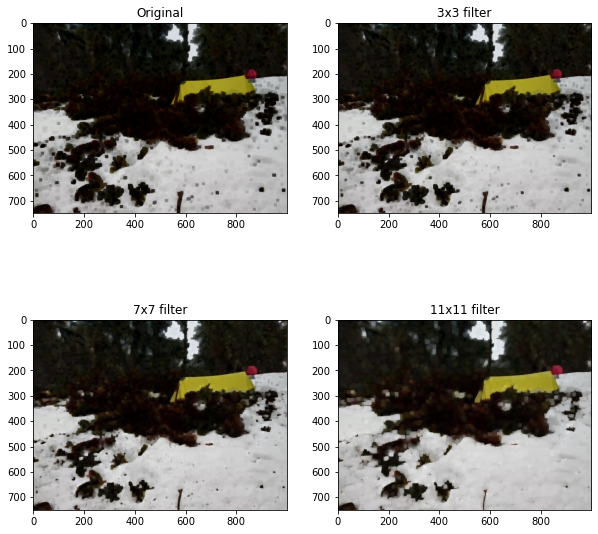

In [10]:
%%time
dilation("img_eroded.jpeg")

### 3.3 Opening

In [11]:
def opening(img):
    """reads an image and performs opening op given a kernel"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    kernel_3 = np.ones((3,3), np.uint8)
    ope_3 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_3)
    
    kernel_7 = np.ones((7,7), np.uint8)
    ope_7 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_7)   
    
    kernel_11 = np.ones((11,11), np.uint8)
    ope_11 = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_11)

    plot_me(img,"Original", ope_3,"3x3 filter", ope_7, "7x7 filter", ope_11, "11x11 filter")

Wall time: 72.1 ms


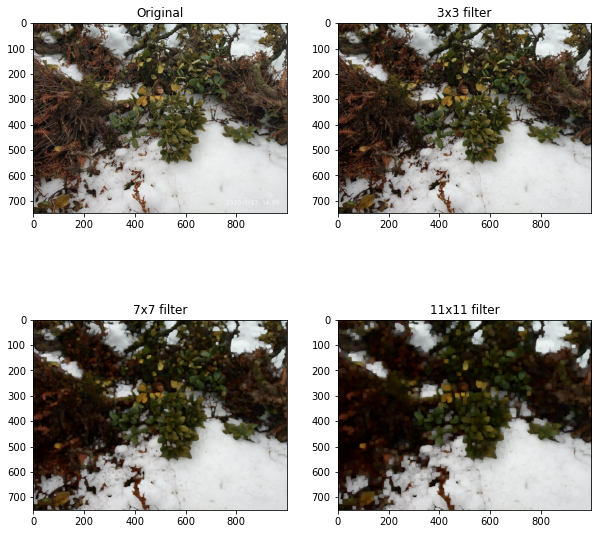

In [12]:
%%time
opening("img1.jpg")

### 3.4 closing

In [13]:
def closing(img):
    """reads an image and performs closing op given a kernel"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    kernel_3 = np.ones((3,3), np.uint8)
    clo_3 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_3)
    
    kernel_7 = np.ones((7,7), np.uint8)
    clo_7 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_7)

    kernel_11 = np.ones((11,11), np.uint8)
    clo_11 = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_11)

    plot_me(img,"Original", clo_3,"3x3 filter", clo_7, "7x7 filter", clo_11, "11x11 filter")

Wall time: 105 ms


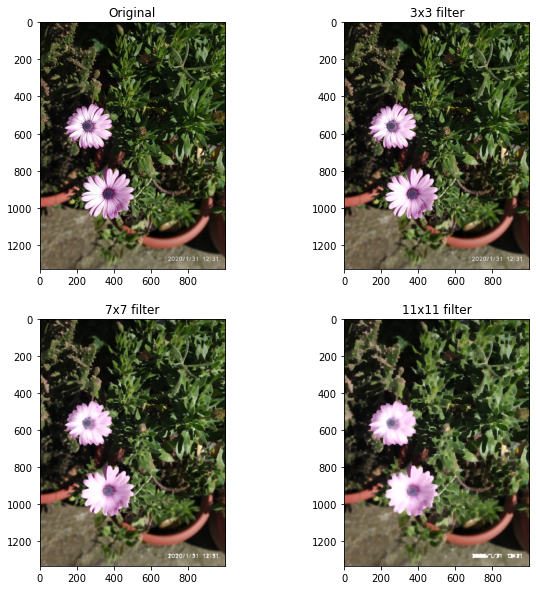

In [14]:
%%time
closing("flower.jpg")

### 3.5 Morphological Gradient

In [15]:
def morph_grad(img):
    """reads an image and performs morphological gradient op given a kernel"""
    img = cv2.imread(img)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    kernel_3 = np.ones((3,3), np.uint8)
    mg_3 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_3)
    
    kernel_7 = np.ones((7,7), np.uint8)
    mg_7 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_7)
    
    kernel_11 = np.ones((11,11), np.uint8)
    mg_11 = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel_11)
    
    plot_me(img,"Original", mg_3,"3x3 filter",  mg_7, "7x7 filter", mg_11, "11x11 filter")

Wall time: 108 ms


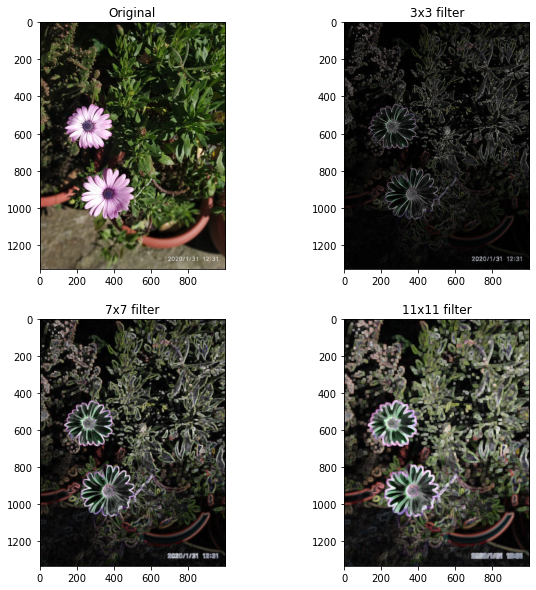

In [16]:
%%time
morph_grad("flower.jpg")

## references:
- https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_morphological_ops/py_morphological_ops.html